In [184]:
### Maven Unicorn Data Challenge
#load Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

#Load Data
df = pd.read_csv('Unicorn_Companies.csv')
df.head()


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [185]:
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [187]:
# Finding missing values
df.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [188]:
# Drop rows with missing values
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1057 non-null   object
 1   Valuation         1057 non-null   object
 2   Date Joined       1057 non-null   object
 3   Industry          1057 non-null   object
 4   City              1057 non-null   object
 5   Country           1057 non-null   object
 6   Continent         1057 non-null   object
 7   Year Founded      1057 non-null   int64 
 8   Funding           1057 non-null   object
 9   Select Investors  1057 non-null   object
dtypes: int64(1), object(9)
memory usage: 90.8+ KB


In [189]:
# Remove "$" and "B" and cast "Valuation" as float

df["Valuation"] = (df["Valuation"]
    .str.replace("$", "")
    .str.replace("B", "000000000")
    .astype(float))


In [190]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [191]:
# Removing "Unknown" from Funding row
df["Funding"]. value_counts()
df = df[df["Funding"] != "Unknown"]
df.shape

(1045, 10)

In [192]:
# Remove "$" and "B" and cast "Funding" as float
df["Funding"] = (df["Funding"]
    .str.replace("$", "")
    .str.replace("B", "000000000")
    .str.replace("M", "000000")
    .astype(float)
)



In [193]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [194]:
val = df.loc[:,'Valuation'].values
fund = df.loc[:,'Funding'].values

In [195]:
val

array([1.8e+11, 1.0e+11, 1.0e+11, ..., 1.0e+09, 1.0e+09, 1.0e+09])

In [196]:
#Plot Graphs to check correlations between variables
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Text(0.5, 1.0, 'Funding vs Valuation')

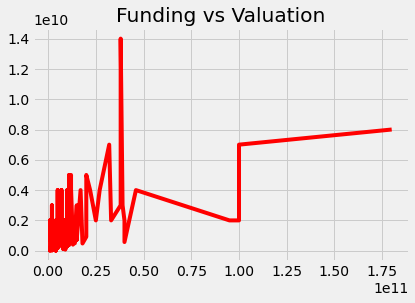

In [197]:
plt.style.use('fivethirtyeight')

plt.plot(val, fund, c = 'r')
plt.title('Funding vs Valuation')

# There is no correlation between Valuation and Funding


In [198]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` para

<AxesSubplot:>

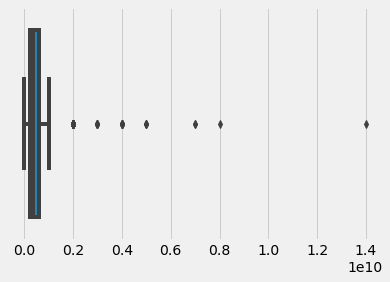

In [199]:
sns.boxplot(x= fund, data=df)

In [200]:
df.sort_values(by='Funding',ascending=False).head(20)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
8,JUUL Labs,3.800000e+10,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,1.400000e+10,Tiger Global Management
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
11,Epic Games,3.200000e+10,2018-10-26,Other,Cary,United States,North America,1991,7.000000e+09,"Tencent Holdings, KKR, Smash Ventures"
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
43,Global Switch,1.100000e+10,2016-12-22,Hardware,London,United Kingdom,Europe,1998,5.000000e+09,"Aviation Industry Corporation of China, Essenc..."
16,J&T Express,2.000000e+10,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,5.000000e+09,"Hillhouse Capital Management, Boyu Capital, Se..."
41,Swiggy,1.100000e+10,2018-06-21,"Supply chain, logistics, & delivery",Bengaluru,India,Asia,2014,5.000000e+09,"Accel India, SAIF Partners, Norwest Venture Pa..."
38,Xingsheng Selected,1.200000e+10,2020-07-22,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,5.000000e+09,"KKR, Tencent Holdings, Sequoia Capital China"
89,Ola Cabs,7.000000e+09,2014-10-27,Auto & transportation,Bengaluru,India,Asia,2010,4.000000e+09,"Accel Partners, SoftBank Group, Sequoia Capital"
15,BYJU's,2.200000e+10,2017-07-25,Edtech,Bengaluru,India,Asia,2008,4.000000e+09,"Tencent Holdings, Lightspeed India Partners, S..."


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1045 non-null   object 
 1   Valuation         1045 non-null   float64
 2   Date Joined       1045 non-null   object 
 3   Industry          1045 non-null   object 
 4   City              1045 non-null   object 
 5   Country           1045 non-null   object 
 6   Continent         1045 non-null   object 
 7   Year Founded      1045 non-null   int64  
 8   Funding           1045 non-null   float64
 9   Select Investors  1045 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 89.8+ KB


In [202]:
# Extract Year from date joined to calculate the number of years to get to Unicorn status
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year Joined'] = df['Date Joined'].dt.year
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",2011


In [203]:
df["Company"].value_counts().sum()

1045

In [204]:
Pandemic_Year = df["Year Joined"]==2021


In [205]:
df[Pandemic_Year].head()


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
16,J&T Express,2.000000e+10,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,5.000000e+09,"Hillhouse Capital Management, Boyu Capital, Se...",2021
24,Blockchain.com,1.400000e+10,2021-02-17,Fintech,London,United Kingdom,Europe,2011,4.900000e+08,"Lightspeed Venture Partners, Google Ventures, ...",2021
27,OpenSea,1.300000e+10,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,4.270000e+08,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2021
34,Getir,1.200000e+10,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,2.000000e+09,"Tiger Global Management, Sequoia Capital, Revo...",2021
37,GoodLeap,1.200000e+10,2021-10-13,Internet software & services,Roseville,United States,North America,2003,8.000000e+08,"New Enterprise Associates, BDT Capital Partner...",2021


In [206]:
# Extract the count of the companies that reach Unicorn in 2021.
df[Pandemic_Year]["Industry"].str.upper().value_counts()

FINTECH                                131
INTERNET SOFTWARE & SERVICES           115
E-COMMERCE & DIRECT-TO-CONSUMER         42
HEALTH                                  40
ARTIFICIAL INTELLIGENCE                 35
CYBERSECURITY                           27
SUPPLY CHAIN, LOGISTICS, & DELIVERY     24
OTHER                                   20
DATA MANAGEMENT & ANALYTICS             20
HARDWARE                                14
EDTECH                                  12
CONSUMER & RETAIL                        7
MOBILE & TELECOMMUNICATIONS              6
AUTO & TRANSPORTATION                    4
TRAVEL                                   3
Name: Industry, dtype: int64

In [207]:
# Save clean data for visualization in Power BI
df.to_csv('Unicorn_Companies', index = False)